In [1]:
import os 
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [31]:
path="/home/saab/Desktop/IHC_validation_cohort_results/same_section"
os.makedirs(path,exist_ok=True)

In [43]:
i1=sorted(glob("/home/saab/Desktop/IHC_validation_cohort_results/same_section/*"))
i2=sorted(glob("/home/saab/Desktop/IHC_validation_cohort_results/serial_section/*"))
i3=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/H&E_TIFF_Cropped/*"))
i4=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/IHC_TIFF_Cropped_and_correct/*"))

len(i1)==len(i2)==len(i3)==len(i4)

True

In [32]:
i1=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/IoU/Validation Dataset/Validation_Pred_IoU_CD3N &P/Same/CD3P/*"))
i2=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/*"))
i3=sorted(glob("/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Raw_Data/Validation Dataset/H&E_TIFF_Cropped/*"))

len(i1)==len(i2)==len(i3)

True

KeyboardInterrupt: 

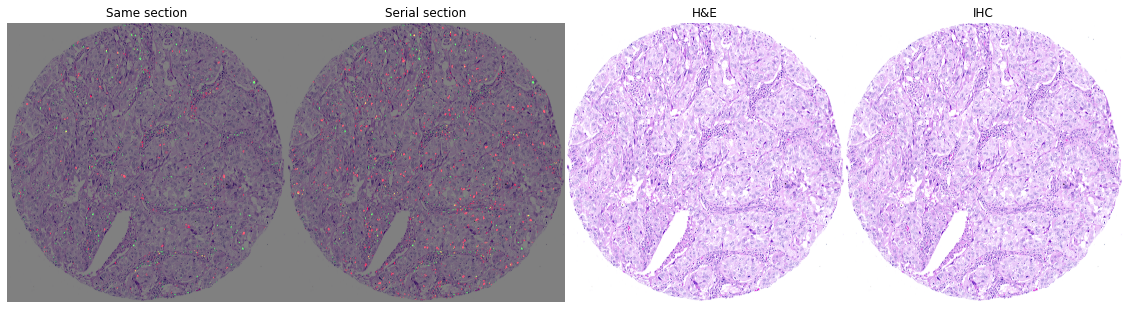

In [48]:
path="/home/saab/Desktop/IHC_validation_cohort_results/combined/"
os.makedirs(path,exist_ok=True)
j=0
for x,y,z,w in zip(i1[:],i2[:],i3[:],i4[:]):
    a=cv2.imread(x)
    b=cv2.imread(y)
    c=cv2.imread(z)
    d=cv2.imread(w)
    a=cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
    #a=np.load(x)
    b=cv2.cvtColor(b,cv2.COLOR_BGR2RGB)
    c=cv2.cvtColor(c,cv2.COLOR_BGR2RGB)
    d=cv2.cvtColor(d,cv2.COLOR_BGR2RGB)
    fig,ax=plt.subplots(1,4,figsize=(105,105))
    ax[0].imshow(a)
    ax[0].set_title("Same section")
    ax[0].axis("off")
    ax[1].imshow(b)
    ax[1].set_title("Serial section")
    ax[1].axis("off")
    ax[2].set_title("H&E")
    ax[2].imshow(c)
    ax[2].axis("off")
    ax[3].set_title("IHC")
    ax[3].imshow(c)
    ax[3].axis("off")
    fig.subplots_adjust(wspace=0, hspace=0.1)
    plt.savefig(path+f"{j:03d}"+".jpg",bbox_inches='tight')
    j=j+1
    plt.close()

In [33]:
j=0
for x,y,z in zip(i1[:],i2[:],i3[:]):

    c=cv2.imread(z)
    a=np.load(x)
    b=np.load(y)
    #c=cv2.cvtColor(c,cv2.COLOR_BGR2RGB)
    mask=cv2.merge([np.zeros_like(a),b,a])
    mask=np.array(mask,np.uint8)
    final_1=cv2.addWeighted(mask,1,c,0.5,0)
    cv2.imwrite(path+"/"+f"{j:03d}"+".png",final_1)
    j=j+1
    #plt.close()

In [21]:
mask.dtype

dtype('int32')